In [2]:
    import os
    import pandas as pd
    import numpy as np
    import matplotlib.pyplot as plt
    %matplotlib inline
    import seaborn as sns
    sns.set()
    import warnings 
    warnings.filterwarnings('ignore')

In [3]:
dataset = pd.read_csv('Outlier_detection.csv')
dataset.head()

,cgpa,placement_exam_marks,placed
0,7.19,26.0,1
1,7.46,38.0,1
2,7.54,40.0,1
3,6.42,8.0,1
4,7.23,17.0,0


In [4]:
dataset.isnull().sum()

cgpa                    0
placement_exam_marks    0
placed                  0
dtype: int64

In [5]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 3 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   cgpa                  1000 non-null   float64
 1   placement_exam_marks  1000 non-null   float64
 2   placed                1000 non-null   int64  
dtypes: float64(2), int64(1)
memory usage: 23.6 KB


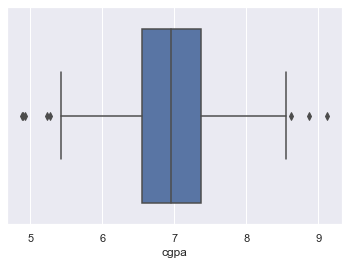

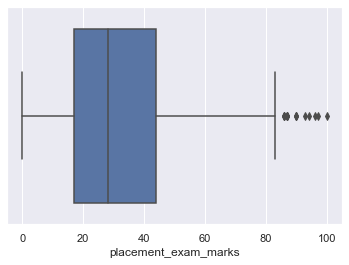

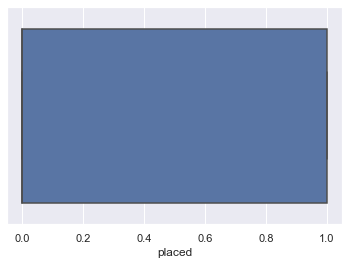

In [6]:
# def boxplots for no. of variables and to find those number of variables outlier

def boxplots(col):
    sns.boxplot(dataset[col])
    plt.show()
    
for i in list(dataset.select_dtypes(exclude=['object']).columns)[0:]: # code for more than 2 boxplot 
    boxplots(i)

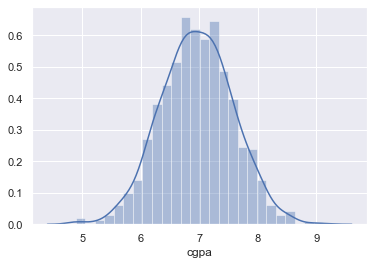

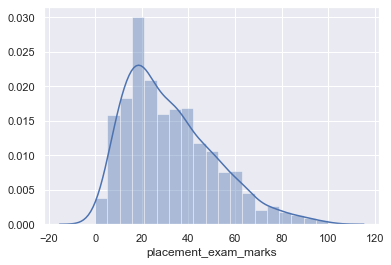

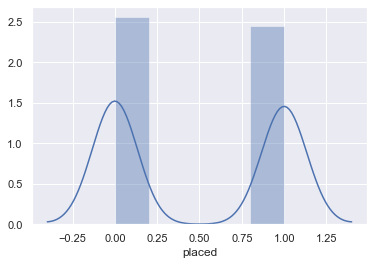

In [7]:
# plotting distibution plots

def distribution(col):
    sns.distplot(dataset[col])
    plt.show()
    
for i in list(dataset.columns)[0:]:
    distribution(i)

In [8]:
dataset.columns

Index(['cgpa', 'placement_exam_marks', 'placed'], dtype='object')

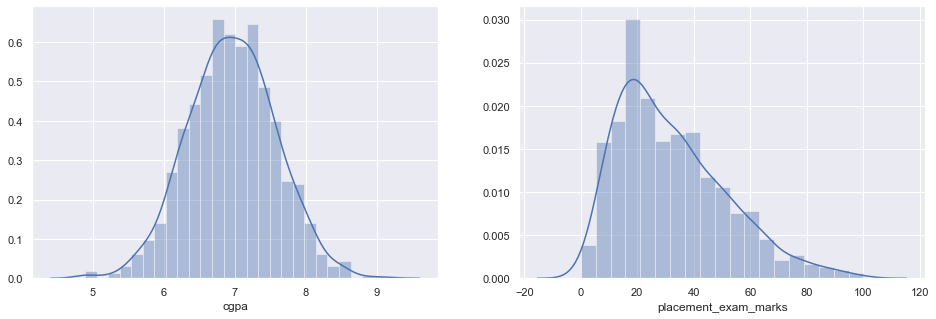

In [9]:
# distribution plot of graphs in one row itself

plt.figure(figsize = (16,5)) # defining size of both graphs in total
plt.subplot(1,2,1) # here 1 repesents row, 2 means two nos. columns of graphs we want and 1 is sequence of graphs in single row
sns.distplot(dataset['cgpa']) # calling each graphs we want as per above line sequence

plt.subplot(1,2,2) # here 1 repesents row, 2 means two nos. columns of graphs we want and 2 is sequence of graphs in single row
sns.distplot(dataset['placement_exam_marks'])

plt.show()

In [10]:
# another way to know whether distribution plot is right or left skew

dataset['cgpa'].skew() #below will give -0.014 which is very close to 0 & so its normal distribution with one small tail in left

-0.014529938929314918

In [11]:
dataset['placement_exam_marks'].skew() #below will give 0.8 which means its right tail / positive skewed

0.8356419499466834

In [12]:
dataset.describe()

,cgpa,placement_exam_marks,placed
count,1000.000000,1000.000000,1000.000000
mean,6.961240,32.225000,0.489000
std,0.615898,19.130822,0.500129
min,4.890000,0.000000,0.000000
25%,6.550000,17.000000,0.000000
50%,6.960000,28.000000,0.000000
75%,7.370000,44.000000,1.000000
max,9.120000,100.000000,1.000000


In [13]:
#### above table can also in knowing whether our datas are normal distribution or left/right skewed

In [14]:
# finding highest and lowest z-scores

print('Highest value of z-scores', dataset['cgpa'].mean() + 3*dataset['cgpa'].std())
print('Lowest value of z-scores', dataset['cgpa'].mean() - 3*dataset['cgpa'].std())

Highest value of z-scores 8.808933625397177
Lowest value of z-scores 5.113546374602842


In [15]:
# finding outliers

dataset[(dataset['cgpa']>8.8) | (dataset['cgpa']<5.11)]

,cgpa,placement_exam_marks,placed
485,4.92,44.0,1
995,8.87,44.0,1
996,9.12,65.0,1
997,4.89,34.0,0
999,4.90,10.0,1


## Approach 1 - trimming - Normal Distribution method 
Normal Distribution method - used for symmetrical datas (another is box plot - explained below - its used for skewed datas)

In [16]:
# in this method we remove outliers and keep those datas within +3sigma and -3sigma

new_df = dataset[(dataset['cgpa']<8.8) & (dataset['cgpa']>5.11)]
new_df.describe()

,cgpa,placement_exam_marks,placed
count,995.000000,995.000000,995.000000
mean,6.963357,32.188945,0.487437
std,0.600082,19.130298,0.500094
min,5.230000,0.000000,0.000000
25%,6.550000,17.000000,0.000000
50%,6.960000,28.000000,0.000000
75%,7.365000,44.000000,1.000000
max,8.620000,100.000000,1.000000


## Approach 2 - capping (very useful and mostly used and very popular)
Normal Distribution method - used for symmetrical datas (another is box plot - explained below - its used for skewed datas)

In [17]:
# using zscore to find zscore of each cgpa values and keep in seperate new formed columns

dataset['cgpa_zscore'] = (dataset['cgpa'] - dataset['cgpa'].mean()) / dataset['cgpa'].std()
dataset

,cgpa,placement_exam_marks,placed,cgpa_zscore
0,7.19,26.0,1,0.371425
1,7.46,38.0,1,0.809810
2,7.54,40.0,1,0.939701
3,6.42,8.0,1,-0.878782
4,7.23,17.0,0,0.436371
...,...,...,...,...
995,8.87,44.0,1,3.099150
996,9.12,65.0,1,3.505062
997,4.89,34.0,0,-3.362960
998,8.62,46.0,1,2.693239


In [18]:
# find outlier values

dataset[(dataset['cgpa_zscore'] > 3) | (dataset['cgpa_zscore'] < -3)]

,cgpa,placement_exam_marks,placed,cgpa_zscore
485,4.92,44.0,1,-3.314251
995,8.87,44.0,1,3.099150
996,9.12,65.0,1,3.505062
997,4.89,34.0,0,-3.362960
999,4.90,10.0,1,-3.346724


In [19]:
# finding upper and lower limit

upper_limit = dataset['cgpa'].mean() + 3*dataset['cgpa'].std()
lower_limit = dataset['cgpa'].mean() - 3*dataset['cgpa'].std()

print('upper_limit : ',upper_limit)
print('lower_limit : ', lower_limit)

upper_limit :  8.808933625397177
lower_limit :  5.113546374602842


In [20]:
# finding datasets those are outliers

dataset[(dataset['cgpa']>upper_limit) | (dataset['cgpa']<lower_limit)]

,cgpa,placement_exam_marks,placed,cgpa_zscore
485,4.92,44.0,1,-3.314251
995,8.87,44.0,1,3.099150
996,9.12,65.0,1,3.505062
997,4.89,34.0,0,-3.362960
999,4.90,10.0,1,-3.346724


In [21]:
# capping method - to replace those values which are below lowerlimit and above upperlimit

dataset['cgpa'] = np.where(dataset['cgpa'] > upper_limit, upper_limit,
                           np.where(dataset['cgpa'] < lower_limit, lower_limit, dataset['cgpa']))

In [22]:
dataset.describe()

,cgpa,placement_exam_marks,placed,cgpa_zscore
count,1000.000000,1000.000000,1000.000000,1.000000e+03
mean,6.961499,32.225000,0.489000,-1.600275e-14
std,0.612688,19.130822,0.500129,1.000000e+00
min,5.113546,0.000000,0.000000,-3.362960e+00
25%,6.550000,17.000000,0.000000,-6.677081e-01
50%,6.960000,28.000000,0.000000,-2.013321e-03
75%,7.370000,44.000000,1.000000,6.636815e-01
max,8.808934,100.000000,1.000000,3.505062e+00


# boxplot method - interquartile concept

In [23]:
dataset.columns

Index(['cgpa', 'placement_exam_marks', 'placed', 'cgpa_zscore'], dtype='object')

In [24]:
dataset.describe()

,cgpa,placement_exam_marks,placed,cgpa_zscore
count,1000.000000,1000.000000,1000.000000,1.000000e+03
mean,6.961499,32.225000,0.489000,-1.600275e-14
std,0.612688,19.130822,0.500129,1.000000e+00
min,5.113546,0.000000,0.000000,-3.362960e+00
25%,6.550000,17.000000,0.000000,-6.677081e-01
50%,6.960000,28.000000,0.000000,-2.013321e-03
75%,7.370000,44.000000,1.000000,6.636815e-01
max,8.808934,100.000000,1.000000,3.505062e+00


In [25]:
dataset['placement_exam_marks'].describe()

count    1000.000000
mean       32.225000
std        19.130822
min         0.000000
25%        17.000000
50%        28.000000
75%        44.000000
max       100.000000
Name: placement_exam_marks, dtype: float64

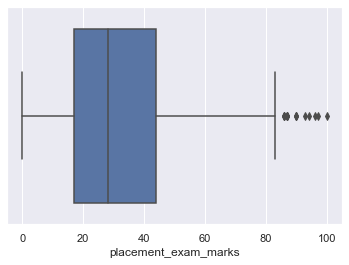

In [26]:
sns.boxplot(dataset['placement_exam_marks'])

In [27]:
# finding IQR

Q1 = percentile25 = dataset['placement_exam_marks'].quantile(0.25)
Q3 = percentile75 = dataset['placement_exam_marks'].quantile(0.75)
IQR = Q3 - Q1

print('Percentile25', Q1)
print('Percentile75', Q3)
print('InerQuartileRange', IQR)

Percentile25 17.0
Percentile75 44.0
InerQuartileRange 27.0


In [28]:
# finding upper and lower limit

upper_L = Q3 + 1.5*IQR
lower_L = Q1 - 1.5*IQR

print('Upperlimit : ', upper_L)
print('Lowerlimit : ', lower_L)

Upperlimit :  84.5
Lowerlimit :  -23.5


In [29]:
# finding outliers

dataset[(dataset['placement_exam_marks']>upper_L) | (dataset['placement_exam_marks']<lower_L)]

,cgpa,placement_exam_marks,placed,cgpa_zscore
9,7.75,94.0,1,1.280667
40,6.60,86.0,1,-0.586526
61,7.51,86.0,0,0.890992
134,6.33,93.0,0,-1.024910
162,7.80,90.0,0,1.361849
283,7.09,87.0,0,0.209061
290,8.38,87.0,0,2.303564
311,6.97,87.0,1,0.014223
324,6.64,90.0,0,-0.521580
630,6.56,96.0,1,-0.651472


## Approach 1 - Trimming

In [30]:
new_df = dataset[dataset['placement_exam_marks'] < upper_L]

In [31]:
new_df.shape

(985, 4)

In [32]:
new_df.describe()

,cgpa,placement_exam_marks,placed,cgpa_zscore
count,985.000000,985.000000,985.00000,985.000000
mean,6.961856,31.339086,0.48934,0.000575
std,0.611469,17.857633,0.50014,0.998110
min,5.113546,0.000000,0.00000,-3.362960
25%,6.550000,17.000000,0.00000,-0.667708
50%,6.960000,28.000000,0.00000,-0.002013
75%,7.370000,43.000000,1.00000,0.663681
max,8.808934,83.000000,1.00000,3.505062


# Approach 2 - Capping Method

In [33]:
new_df_Cap = dataset.copy()

In [34]:
new_df_Cap.head()

,cgpa,placement_exam_marks,placed,cgpa_zscore
0,7.19,26.0,1,0.371425
1,7.46,38.0,1,0.809810
2,7.54,40.0,1,0.939701
3,6.42,8.0,1,-0.878782
4,7.23,17.0,0,0.436371


In [35]:
new_df_Cap['placement_exam_marks'] = np.where(new_df_Cap['placement_exam_marks'] > upper_L, upper_L,
                                               np.where(new_df_Cap['placement_exam_marks'] < lower_L, lower_L,
                                                        new_df_Cap['placement_exam_marks']))

In [37]:
new_df_Cap.shape

(1000, 4)

In [42]:
new_df_Cap['placement_exam_marks'].describe()

count    1000.000000
mean       32.136500
std        18.865419
min         0.000000
25%        17.000000
50%        28.000000
75%        44.000000
max        84.500000
Name: placement_exam_marks, dtype: float64

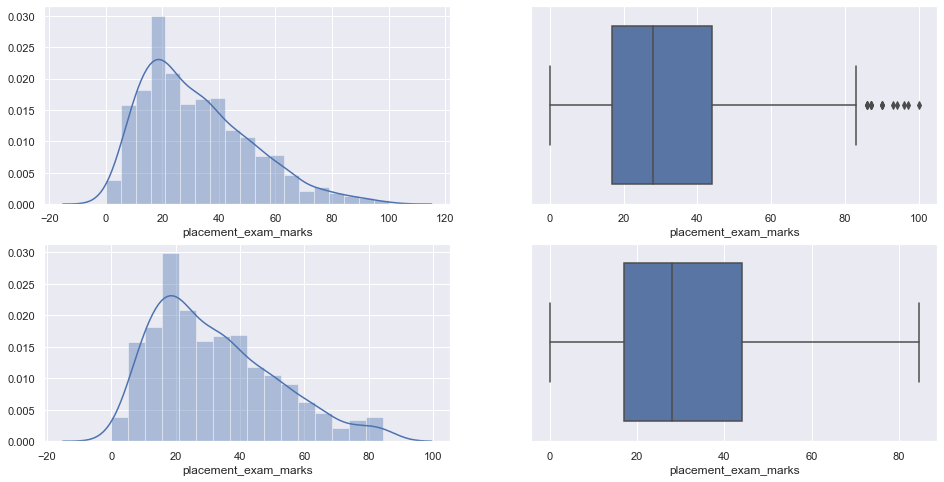

In [45]:
plt.figure(figsize = (16,8))
plt.subplot(2,2,1)
sns.distplot(dataset['placement_exam_marks'])

plt.subplot(2,2,2)
sns.boxplot(dataset['placement_exam_marks'])

plt.subplot(2,2,3)
sns.distplot(new_df_Cap['placement_exam_marks'])

plt.subplot(2,2,4)
sns.boxplot(new_df_Cap['placement_exam_marks'])

plt.show()